# Verifica Prandi Alessandro 28/01

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
data = pd.read_csv("./traffic_accidents.csv")
data.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [3]:
data["first_crash_type"].unique()

array(['TURNING', 'REAR END', 'ANGLE', 'FIXED OBJECT', 'REAR TO FRONT',
       'SIDESWIPE SAME DIRECTION', 'SIDESWIPE OPPOSITE DIRECTION',
       'PEDALCYCLIST', 'PEDESTRIAN', 'HEAD ON', 'PARKED MOTOR VEHICLE',
       'OTHER NONCOLLISION', 'OVERTURNED', 'OTHER OBJECT', 'REAR TO SIDE',
       'ANIMAL', 'TRAIN', 'REAR TO REAR'], dtype=object)

In [31]:
inc_meteo = data[["weather_condition"]].groupby("weather_condition").value_counts()
inc_meteo

weather_condition
BLOWING SAND, SOIL, DIRT         1
BLOWING SNOW                   127
CLEAR                       164700
CLOUDY/OVERCAST               7533
FOG/SMOKE/HAZE                 360
FREEZING RAIN/DRIZZLE          510
OTHER                          627
RAIN                         21703
SEVERE CROSS WIND GATE          32
SLEET/HAIL                     308
SNOW                          6871
UNKNOWN                       6534
Name: count, dtype: int64

In [30]:
inc_ora = data[["crash_hour"]].groupby("crash_hour").value_counts()
inc_ora

crash_hour
0      4487
1      3729
2      3080
3      2364
4      2104
5      2819
6      4772
7      9405
8     11381
9      9300
10     8990
11    10052
12    11726
13    11949
14    13349
15    15894
16    16025
17    16097
18    13431
19     9683
20     8219
21     7472
22     7035
23     5943
Name: count, dtype: int64

In [ ]:

data['crash_date'] = pd.to_datetime(data['crash_date'])
data['anno_mese'] = data['crash_date'].dt.to_period('M')
inc_anno_mese = data.groupby('anno_mese').size()
inc_anno_mese

year_month
2013-03       1
2013-06       1
2015-02       1
2015-05       1
2015-08      75
           ... 
2024-09    2355
2024-10    2379
2024-11    2184
2024-12    2169
2025-01    1036
Freq: M, Length: 118, dtype: int64

In [32]:
weekend_data = data[(data['crash_day_of_week'] == 6) | (data['crash_day_of_week'] == 7)]

media_inc_weekend = weekend_data.groupby('crash_day_of_week').size().mean()
media_inc_weekend

32584.0

In [24]:
data[data["injuries_total"] > 3]

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,year_month
3,2023-08-09 19:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8,2023-08
73,2023-09-22 22:46:00,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,5.0,0.0,5.0,0.0,0.0,0.0,22,6,9,2023-09
81,2023-10-08 02:15:00,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,...,5.0,0.0,0.0,5.0,0.0,0.0,2,1,10,2023-10
168,2019-06-29 16:35:00,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,UNKNOWN INTERSECTION TYPE,STRAIGHT AND LEVEL,DRY,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,...,4.0,0.0,0.0,1.0,3.0,2.0,16,7,6,2019-06
294,2022-07-27 16:58:00,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,4.0,0.0,0.0,4.0,0.0,1.0,16,4,7,2022-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209140,2023-05-26 14:11:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,4.0,0.0,0.0,4.0,0.0,1.0,14,6,5,2023-05
209170,2020-05-24 05:58:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,12.0,0.0,0.0,1.0,11.0,1.0,5,1,5,2020-05
209204,2023-04-08 22:35:00,STOP SIGN/FLASHER,CLEAR,DAWN,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,4.0,0.0,0.0,4.0,0.0,1.0,22,7,4,2023-04
209215,2023-07-24 16:31:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,5.0,0.0,0.0,4.0,1.0,2.0,16,2,7,2023-07


In [ ]:
data['crash_date'] = pd.to_datetime(data['crash_date'])
data['anno'] = data['crash_date'].dt.to_period('Y')
inc_anno = data.groupby('anno').size()
inc_anno

anno
2013        2
2015     1917
2016     7615
2017    17655
2018    27438
2019    27959
2020    22784
2021    25689
2022    25543
2023    25454
2024    26214
2025     1036
Freq: Y-DEC, dtype: int64

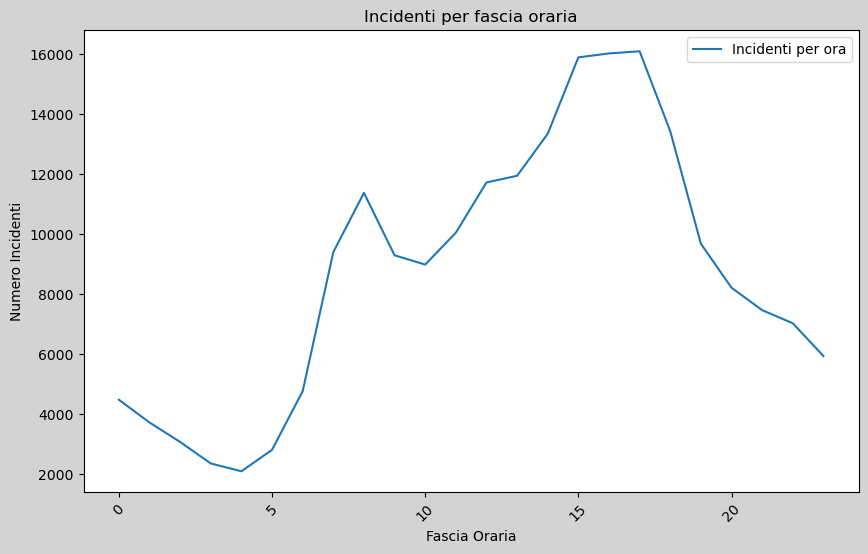

In [ ]:
# ho usato il plot perchè mostra un andamento più lineare e comprensibile
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(inc_ora, label='Incidenti per ora')
ax.set_xlabel("Fascia Oraria")
ax.set_ylabel("Numero Incidenti")
ax.set_title("Incidenti per fascia oraria")
fig.set_facecolor('lightgrey')

ax.legend()
plt.show()

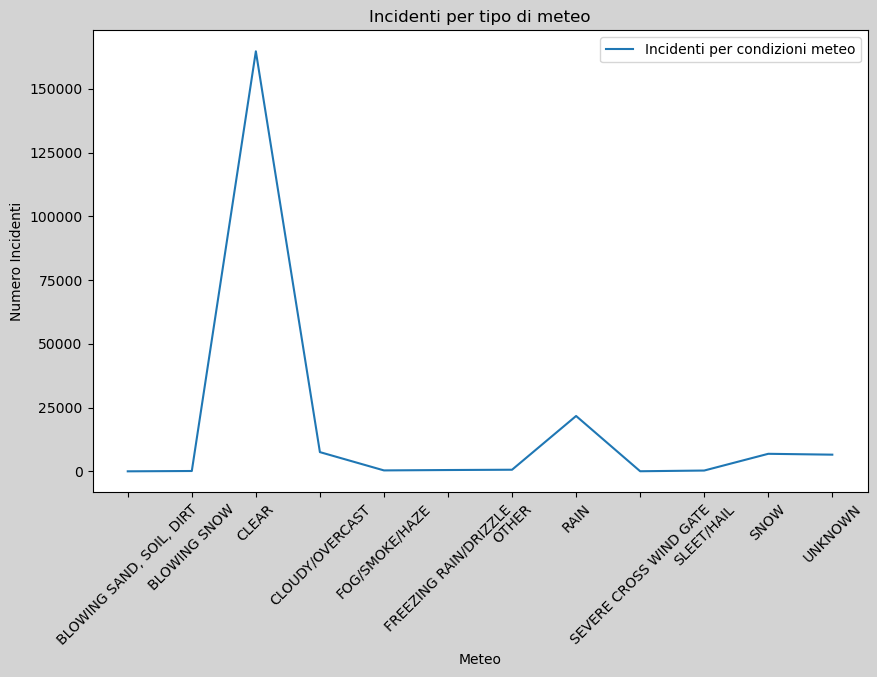

In [ ]:
# ho usato il plot perchè mostra un andamento più lineare e comprensibile
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(inc_meteo, label='Incidenti per condizioni meteo')
ax.set_xlabel("Meteo")
ax.set_ylabel("Numero Incidenti")
ax.set_title("Incidenti per tipo di meteo")
fig.set_facecolor('lightgrey')

ax.legend()
plt.xticks(rotation = 45)
plt.show()

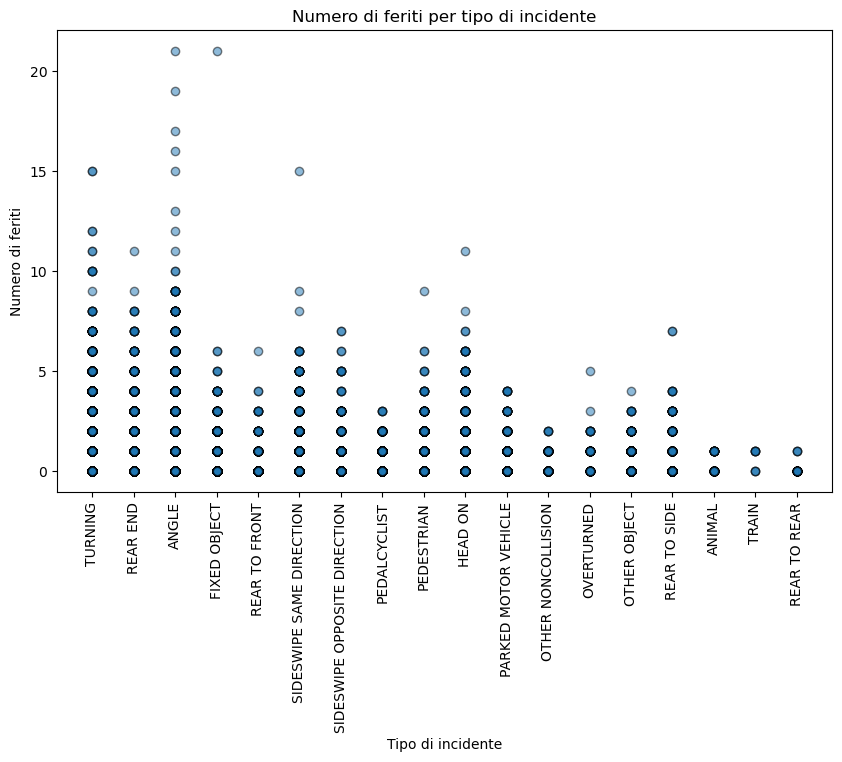

In [68]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(data['first_crash_type'], data['injuries_total'], alpha=0.5, edgecolor='black')

ax.set_xlabel("Tipo di incidente")
ax.set_ylabel("Numero di feriti")
ax.set_title("Numero di feriti per tipo di incidente")

plt.xticks(rotation=90)

plt.show()